# Machine Learning / Aprendizagem Automática

## André Grilo, David Silva, Tiago Gonçalves, and Rodrigo Simões, 2021/22

# ML Project  - Learning about Hit Songs

# Dataset

The dataset to be analysed is **`Spotify_dataset.csv`**, made available together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected data from the following dataset: [Hit Predictor](https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset). **You are encouraged to research the datasets page to learn more about the data**.

The **`Spotify_dataset.csv`** has **41 106 instances** described by **20 data fields** that you might use as **categorical/numerical features**.

### File Descriptions

* **Spotify_dataset.csv** - Tabular/text data to be used in the machine learning tasks.


### Data Fields

* **track** - The Name of the track.
* **artist** - The Name of the Artist.
* **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
* **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
* **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
* **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
* **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
* **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* **duration_ms** - The duration of the track in milliseconds.
* **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **chorus_hit** - This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track.
* **sections** - The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
* **decade** - The decade in which the track was released. It can take on the following values: '60s', '70s', '80s', '90s', '00s', '10s'.
* **hit** - Hit or flop? It can be either 0 or 1. 1 implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a hit. 0 Implies that the track is a flop.

### Valence

For the multiclass classification task, predicting discrete valence, we will create a new column/feature named `DISCRETE_VALENCE`, whose values are obtained by binning the feature `valence` using the following range of values:

* `Negative` - [0, 0.33]
* `Neutral` - (0.33, 0.66]
* `Positive` - (0.66, 1]

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1 Prepare enviroment

pip install kneed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from kneed import KneeLocator, DataGenerator as dg
from sklearn.metrics import silhouette_score

## 0.2. Loading Data

In [2]:
spotify_data = pd.read_csv("Spotify_dataset.csv")

## 0.3. Cleaning Data

As we were looking at the data we found some strange data that was cleary errors. Because of this we first perform data cleaning of those errors.

In [3]:
spotify_data.describe(include=object)

,track,artist,uri,decade
count,41106,41106,41106,41106
unique,35860,11904,40560,6
top,Falling,Traditional,spotify:track:0wz1LjDb9ZNEYwOmDJ3Q4b,60s
freq,17,207,3,8642


In [4]:
spotify_data.describe().drop("count")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


Here we can see something odd. There are a few tracks with the exact same uri, which should not happen. Lets print the top one so see it with more detail.\
Another value that does not make sense is the max loudness being 3.7

In [5]:
spotify_data[spotify_data["uri"] == "spotify:track:7vvRkLPIvfjjmCIqNxBuEZ"]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
1682,Back To Life,Soul II Soul,spotify:track:7vvRkLPIvfjjmCIqNxBuEZ,0.817,0.485,7,-11.659,1,0.143,0.0525,0.00021,0.0391,0.672,100.978,228267,4,48.97966,10,90s,1
7705,Back To Life,Soul II Soul,spotify:track:7vvRkLPIvfjjmCIqNxBuEZ,0.817,0.485,7,-11.659,1,0.143,0.0525,0.00021,0.0391,0.672,100.978,228267,4,48.97966,10,80s,1
8651,Keep On Movin',Soul II Soul (Featuring Caron Wheeler),spotify:track:7vvRkLPIvfjjmCIqNxBuEZ,0.817,0.485,7,-11.659,1,0.143,0.0525,0.00021,0.0391,0.672,100.978,228267,4,48.97966,10,80s,1


The 3 songs have the same uri but some have a different track name and some have a diferent decade

In [6]:
spotify_data = spotify_data.drop_duplicates(subset ="uri", keep = "last")

Lets try to find out if the same thing happens with the pair track,artist which should be unique too

In [7]:
spotify_data_dup = spotify_data[spotify_data.duplicated(subset=["track", "artist"], keep=False)].sort_values(by=["track", "artist"])
spotify_data_dup

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
38261,'Buked and Scorned',Big Joe Williams,spotify:track:4aGBRXIuMVigUiNLtgtIQQ,0.452,0.2390,4,-17.514,0,0.0463,0.689000,0.000195,0.6820,0.6730,92.399,322173,4,50.14461,14,70s,0
38750,'Buked and Scorned',Big Joe Williams,spotify:track:4AyNhn1NCyUsVNThVgkVbS,0.452,0.2390,4,-17.514,0,0.0463,0.689000,0.000195,0.6820,0.6730,92.399,322173,4,50.14461,14,70s,0
28429,"1,000 Eyes",Death,spotify:track:0YCZoL87Sipyc2hWVSN1yP,0.351,0.9930,6,-5.511,0,0.1310,0.000035,0.005230,0.1840,0.0762,109.511,268653,4,38.87768,9,10s,0
29802,"1,000 Eyes",Death,spotify:track:585akfygNuECLHPeI5Megz,0.351,0.9930,6,-5.511,0,0.1310,0.000035,0.005230,0.1840,0.0762,109.511,268653,4,38.87768,9,10s,0
756,3 Gymnopédies: Gymnopedie No. 1,Erik Satie,spotify:track:1jQUjKDjWsVPIYyLANEThG,0.527,0.0291,7,-31.347,1,0.0741,0.994000,0.917000,0.0959,0.2800,99.331,159333,3,41.14856,8,90s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073,Água De Beber,Antônio Carlos Jobim,spotify:track:6R0nUSoTN00Zi8WEVhAKSU,0.659,0.2610,4,-20.265,0,0.0437,0.545000,0.787000,0.0768,0.8810,137.315,170427,4,44.92111,8,60s,0
4021,Águas De Marco,Elis Regina,spotify:track:6KtnRefdp5qDky0OzpvOGh,0.611,0.2670,3,-16.036,1,0.3680,0.843000,0.000347,0.1340,0.8130,149.365,188507,4,54.03654,9,90s,0
33354,Águas De Marco,Elis Regina,spotify:track:33k6iSq1SIVBOaXE898Jv1,0.611,0.3220,3,-13.666,1,0.2870,0.802000,0.000044,0.1210,0.8570,150.686,185773,4,42.88205,10,70s,0
1430,Águas De Março,Antônio Carlos Jobim,spotify:track:1y7OxO5i6sfrHXAmUM77YG,0.652,0.3770,3,-14.848,1,0.1760,0.845000,0.000001,0.1030,0.5060,143.767,212493,4,35.39803,11,90s,0


We can see that the same thing happens. However there is a casa where the track and artist name are equal however the other values are different. We assumed that this happened because a song was released by an artist in one year and then remade some years after. Because of this we removed duplicates with the triplet track,artist,decade in common. \
We will also ignore casing and extra spaces on the left and on the right

In [8]:
spotify_data['track_new'] = spotify_data['track'].str.strip()
spotify_data['track_new'] = spotify_data['track'].str.lower()
spotify_data['artist_new'] = spotify_data['artist'].str.strip()
spotify_data['artist_new'] = spotify_data['artist'].str.lower()
spotify_data['decade_new'] = spotify_data['decade'].str.strip()
spotify_data['decade_new'] = spotify_data['decade'].str.lower()
spotify_data = spotify_data.drop_duplicates(subset = ["track_new", "artist_new", "decade_new"], keep = "last")
spotify_data = spotify_data.drop(columns = ["track_new", "artist_new", "decade_new"])

We decided to remove all the songs with the exact same feature values (excluding track, artist and hit). The fact that they have the same values does not mean that it is an error on data however we decided that the probablity of that happening is so low that we were ready to risk removing good data

In [9]:
dup_columns = spotify_data.columns[3:-1]
spotify_data = spotify_data.drop_duplicates(subset=dup_columns, keep="last")

We removed all the rows that had loudness greater than 0.

In [10]:
spotify_data = spotify_data[spotify_data.loudness <= 0]

Finally we removed all outliers

In [11]:
from scipy import stats

columns_to_rem_outliers = [x for x in spotify_data.columns if x not in ['track','artist','uri','decade']]
columns_to_rem_outliers

z_scores = stats.zscore(spotify_data[columns_to_rem_outliers])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
spotify_data = spotify_data[filtered_entries]

In [12]:
spotify_data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840,4,53.89523,6,90s,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,90s,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267,4,42.05369,9,90s,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933,4,80.99693,10,90s,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653,4,25.57331,20,90s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,Born with the Blues,Buster Benton,spotify:track:2ZARTKpOvYYuR2DxcTjxQo,0.373,0.417,9,-12.273,0,0.0934,0.858000,0.462000,0.0425,0.588,174.359,289653,3,36.12884,14,70s,0
41102,Farther On Down The Road,Joe Simon,spotify:track:1Fj16GGVNFdPut4SFG2vvp,0.470,0.490,2,-11.630,1,0.0915,0.064900,0.000001,0.0574,0.644,176.523,187067,4,33.41380,9,70s,1
41103,Sweetheart,Engelbert Humperdinck,spotify:track:6zm0XoxnzzdFeXeYGE8gFh,0.253,0.550,2,-7.743,1,0.0305,0.155000,0.000021,0.0786,0.643,100.011,183613,4,22.28247,12,70s,1
41104,Until It's Time For You To Go,Neil Diamond,spotify:track:6fsAxEHvbVPU8pVPnBXaX2,0.419,0.124,0,-21.666,1,0.0340,0.800000,0.000100,0.1310,0.178,91.439,211440,3,19.82409,10,70s,1


We know think data is acceptable for analysis and for training models

## 0.4. Understanding data

Lets first get to know the dataset size and feature types:

In [13]:
spotify_data.shape

(36001, 20)

In [14]:
spotify_data.info(verbose=True, memory_usage=False, show_counts=False) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36001 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   track             object 
 1   artist            object 
 2   uri               object 
 3   danceability      float64
 4   energy            float64
 5   key               int64  
 6   loudness          float64
 7   mode              int64  
 8   speechiness       float64
 9   acousticness      float64
 10  instrumentalness  float64
 11  liveness          float64
 12  valence           float64
 13  tempo             float64
 14  duration_ms       int64  
 15  time_signature    int64  
 16  chorus_hit        float64
 17  sections          int64  
 18  decade            object 
 19  hit               int64  
dtypes: float64(10), int64(6), object(4)

It is important for us to understand the distribution of data. For this reason we ploted histograms.

In [15]:
spotify_data_analysis = spotify_data.copy()

In [16]:
spotify_data_analysis.drop(['track','artist','uri'], inplace=True, axis=1)

In [17]:
def histogram(data, column):
    plt.hist(data[column], bins=10)
    plt.title(column)
    plt.show()

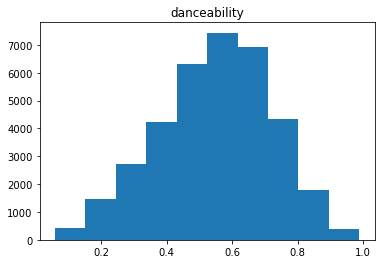

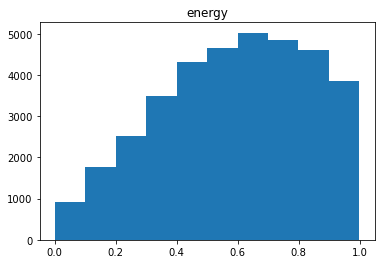

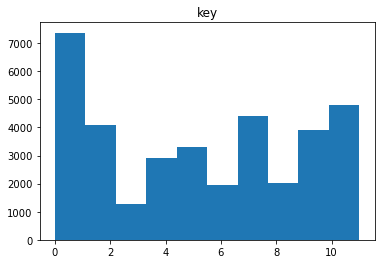

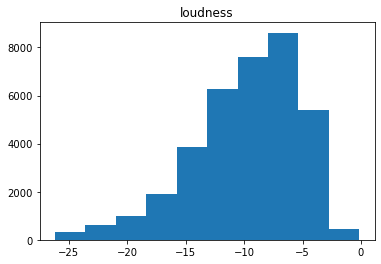

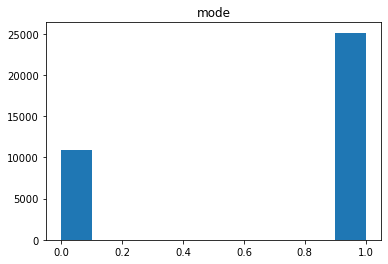

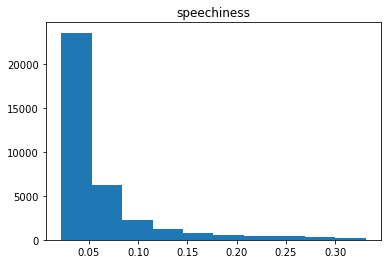

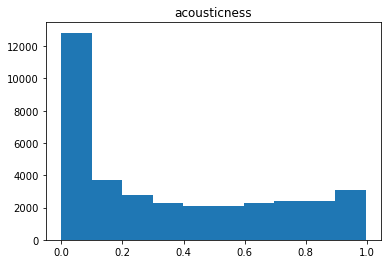

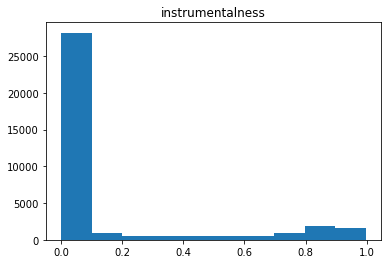

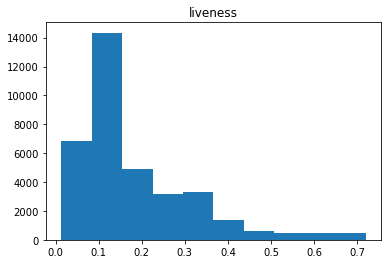

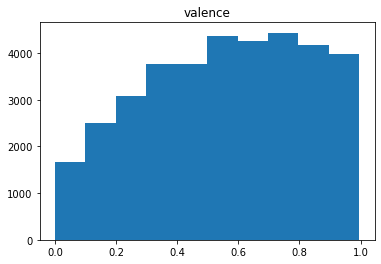

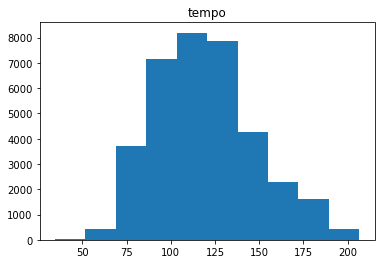

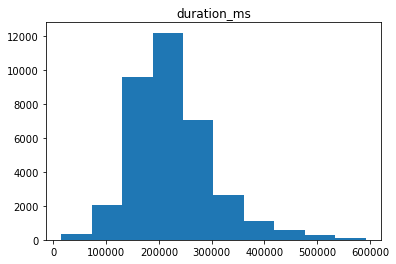

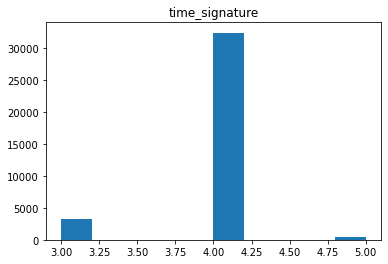

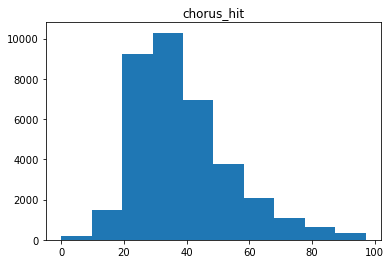

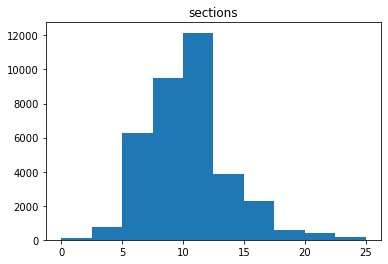

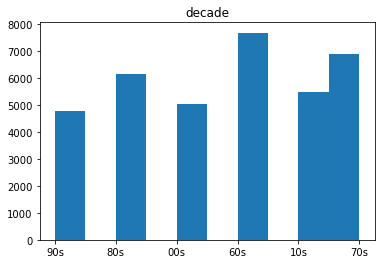

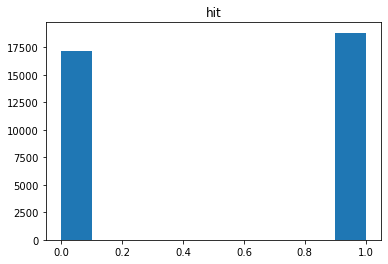

In [18]:
%matplotlib inline
for column in spotify_data_analysis.columns:
    histogram(spotify_data_analysis, column)

From this histograms the most intering facts are that:
- the values of speechiness are almost all up to 0.15
- time signature is very concentrated on the value 4
- instrumentalness is very concentrade on low values (< 0.2)

## Task 1 (Supervised Learning) - Predicting Hit or Flop and Discrete Valence

In this task we will target 2 classification tasks:
1. **Predicting Hit or Flip (binary classification task, target variable is `hit`)**; 
2. **Predicting Discrete Valence (multiclass classification, target variable is `DISCRETE_VALENCE`)**.

Our objective in this task is to train different models using different classifiers with the dataset and then to compare the results so that we can find the best classifier. \
In the journey we will try to train the best model for a given classifier in a way that we have optimized hyperparameters.

Lets first define some auxiliary funcions and imports, you can just ignore them as their implementation is not important for our objective.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
import time

In [20]:
def scale(data, scaler=None):
    if(not scaler):
        scaler = StandardScaler()
    result = scaler.fit_transform(data)
    return pd.DataFrame(result, columns=data.columns), scaler

In [21]:
def get_cm(y_train, pred, labels, ax):
    cm = confusion_matrix(y_train, pred, labels=labels)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels,
            ax=ax)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [22]:
def get_scores(model, X_train, X_test, y_train, y_test):
    cross_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1))
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    acc_train = accuracy_score(y_true=y_train, y_pred=preds_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=preds_test)
    f1 = f1_score(y_true=y_test, y_pred=preds_test, average='micro')
    recall = recall_score(y_test, preds_test, average='micro')
    return {'cross_score':cross_score, 'preds_train': preds_train, 'preds_test':preds_test, 'acc_train':acc_train, 'acc_test':acc_test, 'f1':f1, 'recall':recall}

def print_scores(scores):
    print("Cross validation: {:.3f}".format(scores["cross_score"]))
    print("Accuracy on train set: {:.3f}".format(scores["acc_train"]))
    print("Accuracy on test set: {:.3f}".format(scores["acc_test"]))
    print("F1 on test set: {:.3f}".format(scores["f1"]))
    print("Recall on test set: {:.3f}".format(scores["recall"]))

## 1.1. Preprocessing Data for Classification

Lets just import some packages we will need for this task and make a copy of the dataset

In [23]:
sup_spotify = spotify_data.copy()

We first need to remove meta features

In [24]:
sup_spotify.drop(['track','artist','uri'], inplace=True, axis=1)

We will use distance-based models and as those calculate distance between different feature values we need features that distance calculation makes sense. With the original data we have for example "decade" feature. For example, on this feature it does not make sense that we say that musics from the 60's decade are further from the 10's decade than musics from the 70's, instead we should see it as different values but not further. The same happens for the "key" feature.

For the reason explained before we will have to tranform the "key" and "decade" features into binary columns so the model sees different values as different instead of further.

In [25]:
sup_spotify = pd.get_dummies(sup_spotify, dtype=int, columns=['key'], prefix=['key'])
sup_spotify = pd.get_dummies(sup_spotify, dtype=int, columns=['decade'], prefix=['decade'])

In [26]:
sup_spotify

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_8,key_9,key_10,key_11,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s
0,0.527,0.316,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,...,0,0,0,0,0,0,0,0,0,1
1,0.738,0.541,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,...,0,0,0,0,0,0,0,0,0,1
2,0.736,0.419,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,...,0,0,0,0,0,0,0,0,0,1
3,0.565,0.594,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,...,0,0,0,0,0,0,0,0,0,1
4,0.513,0.760,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.373,0.417,-12.273,0,0.0934,0.858000,0.462000,0.0425,0.588,174.359,...,0,1,0,0,0,0,0,1,0,0
41102,0.470,0.490,-11.630,1,0.0915,0.064900,0.000001,0.0574,0.644,176.523,...,0,0,0,0,0,0,0,1,0,0
41103,0.253,0.550,-7.743,1,0.0305,0.155000,0.000021,0.0786,0.643,100.011,...,0,0,0,0,0,0,0,1,0,0
41104,0.419,0.124,-21.666,1,0.0340,0.800000,0.000100,0.1310,0.178,91.439,...,0,0,0,0,0,0,0,1,0,0


For the next step we will linearlize the dataset to some features don´t rule the others. \
In the interest of preventing information about the distribution of the test set leaking into the model, we should fit the scaler on the training data only, then standardise both training and test sets with the fitted scaler. \
By fitting the scaler on the full dataset prior to splitting, information about the test set is used to transform the training set, which in turn is passed downstream.

In [27]:
X_hit, y_hit = sup_spotify.drop('hit', axis=1), sup_spotify['hit']
X_valence, y_valence = sup_spotify.drop('valence', axis=1), pd.cut(sup_spotify.valence, bins=[0, 0.33, 0.66, 1], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)
X_train_hit, X_test_hit, y_train_hit, y_test_hit = train_test_split(X_hit, y_hit, random_state=42)

In [28]:
X_train_hit, scaler = scale(X_train_hit)
X_test_hit, scaler = scale(X_test_hit, scaler)

In [29]:
X_test_hit

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_8,key_9,key_10,key_11,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s
0,-1.560205,-0.697786,-0.277065,0.663967,-0.597408,0.831988,-0.445687,2.052817,-1.444712,-0.455643,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,1.935811,-0.497534,-0.453430,-0.39183
1,0.813764,-0.335019,-0.760891,-1.506100,-0.407266,-0.104512,1.915788,-0.911429,0.866019,-0.376417,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,-0.516579,2.009914,-0.453430,-0.39183
2,-0.498627,-0.512280,-0.511721,0.663967,-0.518339,0.804711,-0.476722,2.954883,0.969314,-0.346286,...,4.217965,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,1.935811,-0.497534,-0.453430,-0.39183
3,0.533787,0.596632,0.609878,-1.506100,0.033261,0.880480,-0.481684,-0.520287,1.045828,-0.227429,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,2.410109,-0.516579,-0.497534,-0.453430,-0.39183
4,0.708772,-0.009353,1.097443,-1.506100,-0.508926,-0.737937,-0.482174,-0.394590,-0.423246,-0.331150,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,2.410109,-0.516579,-0.497534,-0.453430,-0.39183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.910339,1.091314,0.094162,-1.506100,2.025044,-0.059050,-0.482148,-0.969102,1.152948,-0.113853,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,2.410109,-0.516579,-0.497534,-0.453430,-0.39183
8997,1.204565,1.190251,0.216439,0.663967,-0.493865,0.019749,-0.482160,0.263474,1.516391,-0.588786,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,-0.516579,2.009914,-0.453430,-0.39183
8998,-0.790269,1.528284,-0.369212,0.663967,-0.154998,-1.061402,-0.482124,-0.813828,-1.329940,-0.047743,...,-0.237081,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,-0.516579,-0.497534,2.205412,-0.39183
8999,-1.507710,-0.339141,-1.199854,0.663967,-0.540930,0.962310,2.610850,1.261662,-1.834552,-0.573685,...,4.217965,-0.352934,-0.268674,-0.267960,-0.404192,-0.414919,-0.516579,2.009914,-0.453430,-0.39183


In [30]:
X_valence, y_valence = sup_spotify.drop('valence', axis=1), pd.cut(sup_spotify.valence, bins=[0, 0.33, 0.66, 1], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)
X_train_valence, X_test_valence, y_train_valence, y_test_valence = train_test_split(X_valence, y_valence, random_state=42)

X_train_valence, scaler = scale(X_train_valence)
X_test_valence, scaler = scale(X_test_valence, scaler)

## 1.2. Learning Classifiers

For each classifier:
1) Separate dataset into train and test data \
2) Use k-fold Cross-validation to test \
3) Test with test data - (used to test with independent data from the learned data)

We also need to use grid-search from sklearn to test hyper parameters

### 1.2.1. Decision Tree

We will train 4 Decision Tree Classifiers. Two of them we will be trained with the hit as the target and the other two using the discrete valence as the target. \
For each target we will train one of the Decision Trees using the criterion entropy and the other using the gini entropy. We don't consider relevant to variate the other DecisionTreeClassifier parameters.

In [31]:
import seaborn as sns; sns.set()

In [32]:
clf_dt_hit_e = tree.DecisionTreeClassifier(criterion = "entropy", random_state=42)
clf_dt_hit_g = tree.DecisionTreeClassifier(criterion = "gini", random_state=42)
clf_dt_valence_e = tree.DecisionTreeClassifier(criterion = "entropy", random_state=42)
clf_dt_valence_g = tree.DecisionTreeClassifier(criterion = "gini", random_state=42)

In [33]:
%%time
clf_dt_hit_e = clf_dt_hit_e.fit(X_train_hit, y_train_hit)
clf_dt_hit_g = clf_dt_hit_g.fit(X_train_hit, y_train_hit)
clf_dt_valence_e = clf_dt_valence_e.fit(X_train_valence, y_train_valence)
clf_dt_valence_g = clf_dt_valence_g.fit(X_train_valence, y_train_valence)

Wall time: 1.97 s


Plotting the hit trees trained with different criterion makes the diffence in the splitting point clear.

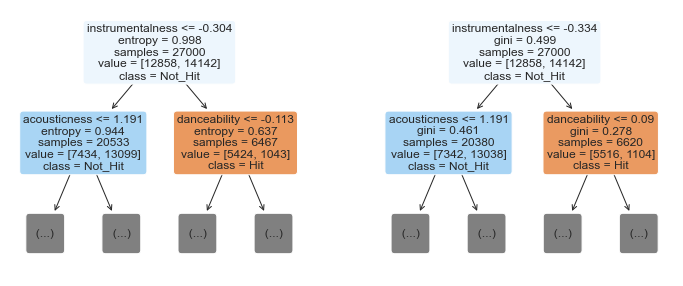

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plot_tree(clf_dt_hit_e,
         filled = True,
         rounded=True,
         class_names=['Hit','Not_Hit'],
         feature_names=X_valence.columns,
         max_depth=1,
         fontsize=12,
         ax=ax1);
plot_tree(clf_dt_hit_g,
         filled = True,
         rounded=True,
         class_names=['Hit','Not_Hit'],
         feature_names=X_valence.columns,
         max_depth=1,
         fontsize=12,
         ax=ax2);

We know want to know which criterion gives our model best performance. As we only want to use the test set to verify performance against other models here we will use cross validation.

In [35]:
cross_score = np.mean(cross_val_score(clf_dt_hit_e, X_train_hit, y_train_hit, cv=6, n_jobs=-1))
print("Cross validarion score with entropy criterion for hit target - " + str(cross_score))
cross_score = np.mean(cross_val_score(clf_dt_hit_g, X_train_hit, y_train_hit, cv=6, n_jobs=-1))
print("Cross validarion score with gini criterion for hit target - " + str(cross_score))

Cross validarion score with entropy criterion for hit target - 0.7083333333333334
Cross validarion score with gini criterion for hit target - 0.7056666666666667


In [36]:
cross_score = np.mean(cross_val_score(clf_dt_valence_e, X_train_valence, y_train_valence, cv=6, n_jobs=-1))
print("Cross validarion score with entropy criterion for discrete valence target - " + str(cross_score))
cross_score = np.mean(cross_val_score(clf_dt_valence_g, X_train_valence, y_train_valence, cv=6, n_jobs=-1))
print("Cross validarion score with gini criterion for discrete valence target - " + str(cross_score))

Cross validarion score with entropy criterion for discrete valence target - 0.5508888888888889
Cross validarion score with gini criterion for discrete valence target - 0.5518518518518518


On both targets entropy criterion and gini had a similar score because of that we choose a random one, in this case entropy to use for latter model comparision.

### 1.2.2. Support Vector Machine

The objective is to find the optimal support vector machine parameters to maximize the model performance (measured with accuracy by default).\
We will use the list of parameters defined below. We choose to vary C and gamma on a range of values we thought were a good bet. The reason why we didn't choose more values for C or gamma or even other kernels and other parameters is because of time. As it is, it took 3 hours for each fitting on a 16 thread CPU.

In [37]:
# defining parameter range
param_grid = {'C': [10, 100, 1000, 5000],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              'cache_size': [10000],
              'random_state': [42]}

In [38]:
grid_svm_hit = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1)
grid_svm_hit.fit(X_train_hit, y_train_hit)

In [ ]:

grid_svm_valence = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1)
grid_svm_valence.fit(X_train_valence, y_train_valence)

Wall time: 3h 7min 58s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 5000], 'cache_size': [10000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf'],
                         'random_state': [42]})

In [ ]:
# print best parameter after tuning
print("Best parameters for svm hit - " + str(grid_svm_hit.best_params_))
print("Best parameters for svm valence - " + str(grid_svm_valence.best_params_))

Best parameters for svm hit - {'C': 5000, 'cache_size': 10000, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 42}
Best parameters for svm valence - {'C': 5000, 'cache_size': 10000, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 42}


{'C': 10, 'cache_size': 10000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=10000, gamma=0.01)

As the optimal C and gamma values are neither the max or the min values choosen then we think we found a good optimal point

### 1.2.3. K-Nearest Neighbors

In [ ]:
param_grid = {'n_neighbors': [5, 10, 15],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              'n_jobs': [-1]}

In [ ]:
grid_knn_hit = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
grid_knn_hit.fit(X_train_hit, y_train_hit)

Wall time: 1min 17s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:

grid_knn_valence = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
grid_knn_valence.fit(X_train_valence, y_train_valence)

Wall time: 1min 15s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Best parameters for svm hit - " + str(grid_knn_hit.best_params_))
print("Best parameters for svm valence - " + str(grid_knn_hit.best_params_))

Best parameters for svm hit - {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
Best parameters for svm valence - {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


### 1.2.4. Naive Bayes

In Gaussian Naive Bayes there is no hyper-parameter to tune so we can just fit the model with the data

In [ ]:

gnb_hit = GaussianNB()
gnb_hit.fit(X_train_hit, y_train_hit)

Wall time: 0 ns


GaussianNB()

In [ ]:

gnb_valence = GaussianNB()
gnb_valence.fit(X_train_valence, y_train_valence)

Wall time: 46.9 ms


GaussianNB()

## 1.3. Classification - Results and Discussion 

### Hit target

We will first get the scores for all the trained models:

In [ ]:

scores_dt_hit_e = get_scores(clf_dt_hit_e, X_train_hit, X_test_hit, y_train_hit, y_test_hit)

Wall time: 642 ms


In [ ]:

scores_svm_hit = get_scores(grid_svm_hit, X_train_hit, X_test_hit, y_train_hit, y_test_hit)

Wall time: 5h 53min 43s


In [ ]:

scores_knn_hit = get_scores(grid_knn_hit, X_train_hit, X_test_hit, y_train_hit, y_test_hit)

Wall time: 1min 40s


In [ ]:

scores_gnb_hit = get_scores(gnb_hit, X_train_hit, X_test_hit, y_train_hit, y_test_hit)

Wall time: 1.33 s


Now lets plot the confusion matrix of the models and also lets print the cores side by side:

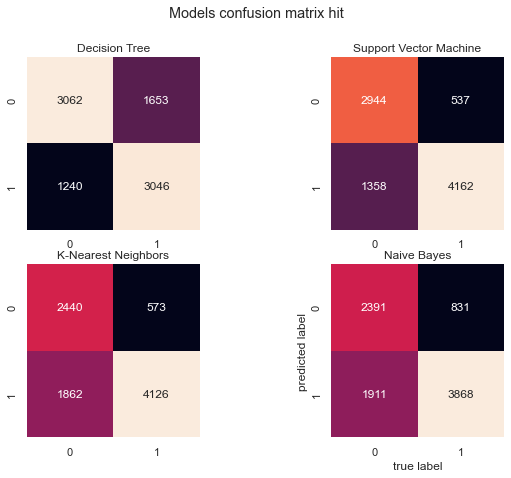

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
fig.suptitle('Models confusion matrix hit')
axs[0, 0].set_title("Decision Tree")
get_cm(y_test_hit, scores_dt_hit_e['preds_test'], clf_dt_hit_e.classes_, axs[0, 0])
axs[0, 1].set_title("Support Vector Machine")
get_cm(y_test_hit, scores_svm_hit['preds_test'], grid_svm_hit.classes_, axs[0, 1])
axs[1, 0].set_title("K-Nearest Neighbors")
get_cm(y_test_hit, scores_knn_hit['preds_test'], grid_knn_hit.classes_, axs[1, 0])
axs[1, 1].set_title("Naive Bayes")
get_cm(y_test_hit, scores_gnb_hit['preds_test'], gnb_hit.classes_, axs[1, 1])

In [ ]:
scores_dt_hit_e['classifier'] = "Decision Tree"
scores_svm_hit['classifier'] = "Support Vector Machine"
scores_knn_hit['classifier'] = "K-Nearest Neighbors"
scores_gnb_hit['classifier'] = "Naive Bayes"
scores_result_hit = pd.DataFrame([scores_dt_hit_e, scores_svm_hit, scores_knn_hit, scores_gnb_hit])
scores_result_hit = scores_result_hit.set_index('classifier')
scores_result_hit = scores_result_hit.drop(['preds_train','preds_test'], axis=1)
scores_result_hit

,cross_score,acc_train,acc_test,f1,recall
classifier,,,,,
Decision Tree,0.706481,1.000000,0.678591,0.678591,0.678591
Support Vector Machine,0.796444,0.816037,0.789468,0.789468,0.789468
K-Nearest Neighbors,0.723926,0.790148,0.729475,0.729475,0.729475
Naive Bayes,0.708630,0.709889,0.695367,0.695367,0.695367


Seeing the confusion matrix and the scores of all the models we can see that support vector machine is the classifier that got better performance.\
However it is important to refer that the support vector machine was also the model that it took more time to find the optimal hyperparameters and to train.\
The model that has the best time to performance ratio is the KNN because of all the models is the one that takes less time to train and it has a low time to predict and at the same time it has a performance comparable with the SVM.

### Discrete valence target

In [ ]:
scores_dt_valence_e = get_scores(clf_dt_valence_e, X_train_valence, X_test_valence, y_train_valence, y_test_valence)
scores_svm_valence = get_scores(grid_svm_valence, X_train_valence, X_test_valence, y_train_valence, y_test_valence)
scores_knn_valence = get_scores(grid_knn_valence, X_train_valence, X_test_valence, y_train_valence, y_test_valence)
scores_gnb_valence = get_scores(gnb_valence, X_train_valence, X_test_valence, y_train_valence, y_test_valence)

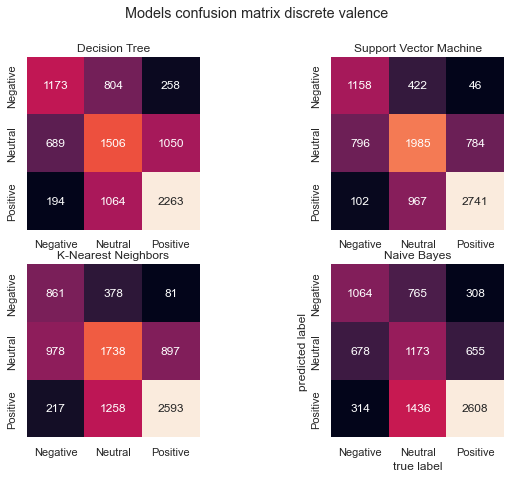

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
fig.suptitle('Models confusion matrix discrete valence')
axs[0, 0].set_title("Decision Tree")
get_cm(y_test_valence, scores_dt_valence_e['preds_test'], clf_dt_valence_e.classes_, axs[0, 0])
axs[0, 1].set_title("Support Vector Machine")
get_cm(y_test_valence, scores_svm_valence['preds_test'], grid_svm_valence.classes_, axs[0, 1])
axs[1, 0].set_title("K-Nearest Neighbors")
get_cm(y_test_valence, scores_knn_valence['preds_test'], grid_knn_valence.classes_, axs[1, 0])
axs[1, 1].set_title("Naive Bayes")
get_cm(y_test_valence, scores_gnb_valence['preds_test'], gnb_valence.classes_, axs[1, 1])

In [ ]:
scores_dt_valence_e['classifier'] = "Decision Tree"
scores_svm_valence['classifier'] = "Support Vector Machine"
scores_knn_valence['classifier'] = "K-Nearest Neighbors"
scores_gnb_valence['classifier'] = "Naive Bayes"
scores_result_valence = pd.DataFrame([scores_dt_valence_e, scores_svm_valence, scores_knn_valence, scores_gnb_valence])
scores_result_valence = scores_result_valence.set_index('classifier')
scores_result_valence = scores_result_valence.drop(['preds_train','preds_test'], axis=1)
scores_result_valence

,cross_score,acc_train,acc_test,f1,recall
classifier,,,,,
Decision Tree,0.548444,1.000000,0.549050,0.549050,0.549050
Support Vector Machine,0.654407,0.701667,0.653705,0.653705,0.653705
K-Nearest Neighbors,0.570741,1.000000,0.576825,0.576825,0.576825
Naive Bayes,0.541926,0.544333,0.538274,0.538274,0.538274


For discrete valence as the target we can the see the same conclusion. SVM is the model that performed the best however KNN is much faster and the performance is not much worst

## Task 2 (Unsupervised Learning) - Characterizing Tracks

In this task you should **use unsupervised learning algorithms and try to characterize the tracks**. You can use:
* **Association rule mining** to find **associations between the features and the target hit/discrete valence**.
* **Clustering algorithms to find similar groups of tracks**. Is it possible to find groups of tracks which are composed of hit songs with similar valences? Are tracks possibly grouped by decade?
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out?

## 2.1. Introduction

This task focus is unsupervised learning. That means that we want to find patterns in the dataset which cointains data points that are neither classified nor labeled.

With this purpose we will use association rule mining and clustering alghorithms.

We want to awnser the following questions:
- Is it possible to make associations between the features and the hit value? So that we find x in x => hit
- Is it possible to make associations between the features and the valence value? So that we find x in x => valence
- Is it possible to cluster the data points into groups of tracks that are hit songs that have similar valances?
- Is it possible to find clusters of songs grouped by decade?

## 2.2. Preprocessing Data for Association

We first need to remove information features.

In [ ]:
rm_data = spotify_data.copy()
rm_data.drop(['track','artist','uri'], inplace=True, axis=1)

First we had to transform some non continuos features into categorical features

In [ ]:
rm_data['key'] = pd.Categorical(rm_data.key)
rm_data['mode'] = pd.Categorical(rm_data['mode'])
rm_data['time_signature'] = pd.Categorical(rm_data.time_signature)
rm_data['decade'] = pd.Categorical(rm_data.decade)
rm_data['hit'] = pd.Categorical(rm_data.hit)

After that we have to transform continuous features into discrete features because if we don't then there will be no relation to be made beacause all the songs will be different.

Here we have to make our first decision which is choosing the number of bins. By one hand if we choose a **big bin number** then it is possible that we keep with the same problem that we started with which is no correlation between itemsets and therefore a **small number of associations** or even no associations and with that we would have a underfitted model. On the other hand if we choose a **small bin number** then we might have **too much associations** with small meaning and a overfitted model because it will be very specific.
We opted out for a value in between the two extremes. \
For this purpose we will use the bin values of 5 and 9.

In [ ]:
def spotify_binning(data, n):
    data = data.copy()
    data['danceability'] = pd.cut(data.danceability, bins=n, right=False)
    data['energy'] = pd.cut(data.energy, bins=n, right=False)
    data['loudness'] = pd.cut(data.loudness, bins=n, right=False)
    data['speechiness'] = pd.cut(data.speechiness, bins=n, right=False)
    data['acousticness'] = pd.cut(data.acousticness, bins=n, right=False)
    data['instrumentalness'] = pd.cut(data.instrumentalness, bins=n, right=False)
    data['liveness'] = pd.cut(data.liveness, bins=n, right=True)
    data['valence'] = pd.cut(data.valence, bins=[0, 0.33, 0.66, 1], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)
    data['tempo'] = pd.cut(data.tempo, bins=n, right=True)
    data['duration_ms'] = pd.cut(data.duration_ms, bins=n, right=True)
    data['chorus_hit'] = pd.cut(data.chorus_hit, bins=n, right=True)
    data['sections'] = pd.cut(data.sections, bins=n, right=True)
    return data

In [ ]:
rm_data_bin5 = spotify_binning(rm_data, 5)
rm_data_bin9 = spotify_binning(rm_data, 9)

The last step of preprocessing is to get the data as binary values. For that we used the get_dummies function which creates a new column for every different value.

In [ ]:
rm_binary_data_bin5 = pd.get_dummies(rm_data_bin5, dtype=bool)
rm_binary_data_bin9 = pd.get_dummies(rm_data_bin9, dtype=bool)

In [ ]:
print("Number of columns with bin = 5 ->", rm_binary_data_bin5.columns.size)
print("Number of columns with bin = 9 ->", rm_binary_data_bin9.columns.size)

Number of columns with bin = 5 -> 83
Number of columns with bin = 9 -> 127


As a result we got 85 columns for bin = 5. The best way to see the final result is to print the columns names. Here are some of them for you to get an ideia:

In [ ]:
before = ''
count = 0
for column in rm_binary_data_bin5.columns:
    if(before == column[0]):
        print(end = " ")
        count += 1
    elif(before != ''):
        print()
        count = 0
    if(count == 3):
        print("...", end=" ")
    elif(count > 3):
        pass
    else:
        print(column, end="")
    before = column[0]

danceability_[0.0593, 0.245) danceability_[0.245, 0.431) danceability_[0.431, 0.617) ...  
energy_[0.000276, 0.2) energy_[0.2, 0.4) energy_[0.4, 0.6) ...  
key_0 key_1 key_2 ...         
loudness_[-26.165, -20.962) loudness_[-20.962, -15.759) loudness_[-15.759, -10.555) ...  
mode_0 mode_1
speechiness_[0.022, 0.0838) speechiness_[0.0838, 0.146) speechiness_[0.146, 0.207) ...  
acousticness_[0.0, 0.199) acousticness_[0.199, 0.398) acousticness_[0.398, 0.598) ...  
instrumentalness_[0.0, 0.199) instrumentalness_[0.199, 0.399) instrumentalness_[0.399, 0.598) ...  
liveness_(0.0123, 0.154] liveness_(0.154, 0.296] liveness_(0.296, 0.437] ...  
valence_Negative valence_Neutral valence_Positive
tempo_(34.324, 68.907] tempo_(68.907, 103.317] tempo_(103.317, 137.728] ...  
duration_ms_(14591.595, 130449.0] duration_ms_(130449.0, 245730.0] duration_ms_(245730.0, 361011.0] ...  
time_signature_3 time_signature_4 time_signature_5
chorus_hit_(-0.0971, 19.429] chorus_hit_(19.429, 38.859] chorus_hit_

## 2.3. Finding Associations

### 2.3.1. Compute Frequent Itemsets using Apriori

The objetive of finding frequent itemsets is to restrict the search for association rules to rules that are frequent. \
Even if an association has a high confidence that does not mean that is strongly supported by data. It can happen that only one itemset supports such association.

In [ ]:
from mlxtend.frequent_patterns import apriori

As the dataset is very big we will have to set the support to a low value

In [ ]:
frequent_itemsets5 = apriori(rm_binary_data_bin5, min_support=0.14, use_colnames=True)
frequent_itemsets9 = apriori(rm_binary_data_bin9, min_support=0.1, use_colnames=True)
pd.set_option('display.max_rows', 10)
frequent_itemsets5.size
frequent_itemsets9.size

2870

1826

We can start to see the phenomenon that was refered before. Lower bin value means more correlation and therefore higher support overall. Even though we lowered the mininum support for the data with bin = 9 it got less frequent itemsets.

### 2.3.2. Generate Association Rules from Frequent Itemsets

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
hit_1 = frozenset(['hit_1'])
hit_0 = frozenset(['hit_0'])
valence_Negative = frozenset(['valence_Negative'])
valence_Neutral = frozenset(['valence_Neutral'])
valence_Positive = frozenset(['valence_Positive'])

Now lets find the association rules from the frequent itemsets filtering by confidence and then by lift.\
We will choose low min_threshold values given the size of the dataset. We trying computing even lower values but it the result was the same.

We will also filter by lift values with the objetive of having as little of rules as possible but very certain.

In [ ]:
### Compute association rules with 80% confidence
rules = association_rules(frequent_itemsets5, metric="confidence", min_threshold=0.7)
rules = rules[rules['lift'] >= 1.4]

#rules["has_hit"] = rules["antecedents"].apply(lambda x: hit.issubset())
rules_hit1_5 = rules[rules['consequents'] == hit_1]
rules_hit0_5 = rules[rules['consequents'] == hit_0]

rules = association_rules(frequent_itemsets5, metric="confidence", min_threshold=0.6)
rules = rules[rules['lift'] >= 1.57]

rules_valNeg_5 = rules[rules['consequents'] == valence_Negative]
rules_valNeu_5 = rules[rules['consequents'] == valence_Neutral]
rules_valPos_5 = rules[rules['consequents'] == valence_Positive]

rules_hit1_5
rules_hit0_5
rules_valNeg_5
rules_valNeu_5
rules_valPos_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
970,"(instrumentalness_[0.0, 0.199), time_signature_4, energy_[0.6, 0.799))",(hit_1),0.231827,0.523347,0.170329,0.734723,1.403894,0.049003,1.796815
2068,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), instrumentalness_[0.0, 0.199), time_signature_4)",(hit_1),0.214438,0.523347,0.158523,0.739249,1.412541,0.046298,1.828000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
237,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838))",(valence_Positive),0.254354,0.394017,0.157718,0.620072,1.573720,0.057498,1.594995
1239,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), instrumentalness_[0.0, 0.199))",(valence_Positive),0.220938,0.394017,0.140052,0.633895,1.608802,0.052998,1.655216
1264,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), time_signature_4)",(valence_Positive),0.246382,0.394017,0.154357,0.626494,1.590018,0.057278,1.622418


In [ ]:
rules = association_rules(frequent_itemsets9, metric="confidence", min_threshold=0.7)
rules = rules[rules['lift'] >= 1.43]

#rules["has_hit"] = rules["antecedents"].apply(lambda x: hit.issubset())
rules_hit1_9 = rules[rules['consequents'] == hit_1]
rules_hit0_9 = rules[rules['consequents'] == hit_0]

rules = association_rules(frequent_itemsets9, metric="confidence", min_threshold=0.5)
rules = rules[rules['lift'] >= 1.33]

rules_valNeg_9 = rules[rules['consequents'] == valence_Negative]
rules_valNeu_9 = rules[rules['consequents'] == valence_Neutral]
rules_valPos_9 = rules[rules['consequents'] == valence_Positive]

rules_hit1_9
rules_hit0_9
rules_valNeg_9
rules_valNeu_9
rules_valPos_9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
168,"(instrumentalness_[0.0, 0.111), danceability_[0.678, 0.782))",(hit_1),0.134968,0.523347,0.101331,0.750772,1.434559,0.030695,1.912518
1201,"(instrumentalness_[0.0, 0.111), mode_1, duration_ms_(207303.0, 271348.0], speechiness_[0.022, 0.0563))",(hit_1),0.143385,0.523347,0.107358,0.748741,1.430679,0.032318,1.897059
1360,"(mode_1, speechiness_[0.022, 0.0563), time_signature_4, instrumentalness_[0.0, 0.111), duration_ms_(207303.0, 271348.0])",(hit_1),0.133469,0.523347,0.101636,0.761498,1.455056,0.031786,1.998534


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1968,"(instrumentalness_[0.0, 0.111), tempo_(110.964, 130.081], time_signature_4)",(valence_Positive),0.199911,0.394017,0.105303,0.526747,1.336865,0.026534,1.280464
1972,"(instrumentalness_[0.0, 0.111), time_signature_4, duration_ms_(143258.0, 207303.0])",(valence_Positive),0.246743,0.394017,0.129413,0.524485,1.331123,0.032192,1.274372
2406,"(instrumentalness_[0.0, 0.111), mode_1, time_signature_4, duration_ms_(143258.0, 207303.0])",(valence_Positive),0.186800,0.394017,0.100192,0.536357,1.361254,0.026589,1.307003


## 2.4. Association Rules - Results and Discussion 

In [ ]:
pd.set_option("max_colwidth", None)

### Hit

First lets look at the rules with consequent = hit

In [ ]:
pd.DataFrame(rules_hit1_5['antecedents'])

,antecedents
970,"(instrumentalness_[0.0, 0.199), time_signature_4, energy_[0.6, 0.799))"
2068,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), instrumentalness_[0.0, 0.199), time_signature_4)"


The first thing that we concluded is that all rules have instrumentalness between 0 and 0.199 and time signature equal to 4.\
This means that this 2 values are very associated with the fact the a songs becomes a hit.

We can now look at the rules made by binnig 9 to try to get more precise values.

In [ ]:
pd.DataFrame(rules_hit1_9['antecedents'])

,antecedents
168,"(instrumentalness_[0.0, 0.111), danceability_[0.678, 0.782))"
1201,"(instrumentalness_[0.0, 0.111), mode_1, duration_ms_(207303.0, 271348.0], speechiness_[0.022, 0.0563))"
1360,"(mode_1, speechiness_[0.022, 0.0563), time_signature_4, instrumentalness_[0.0, 0.111), duration_ms_(207303.0, 271348.0])"


We continue to see instrumentalness however now it is between 0 and 0.111 which is more specific.\
We are also seeing a lot of speechiness between 0.022 and 0.0563.

### Valence

Lets do the same analysis for valence.

In [ ]:
pd.DataFrame(rules_valPos_5['antecedents'])

,antecedents
237,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838))"
1239,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), instrumentalness_[0.0, 0.199))"
1264,"(danceability_[0.617, 0.802), speechiness_[0.022, 0.0838), time_signature_4)"


Were we continue to see the same trend as we saw for hit. Instrumentalness between 0 and 0.199 and time signature equal to 4 appear however not in every rule.\
The values that are in every rule are danceability between 0.617 and 0.0802 and speechiness between 0.022 and 0.0838.

We can now look at the rules made by binnig 9 to try to get more precise values.

In [ ]:
pd.DataFrame(rules_valPos_9['antecedents'])

,antecedents
1968,"(instrumentalness_[0.0, 0.111), tempo_(110.964, 130.081], time_signature_4)"
1972,"(instrumentalness_[0.0, 0.111), time_signature_4, duration_ms_(143258.0, 207303.0])"
2406,"(instrumentalness_[0.0, 0.111), mode_1, time_signature_4, duration_ms_(143258.0, 207303.0])"


We continue to see instrumentalness and time signature equal to 4 and now in every rule. danceability and speechiness are gone.

### Conclusion

Looking at the histograms on the beggining of this project we can see that almost all the ranges of values that we see in the rules are the ones that have a high number of songs. The only range that does not follow this is danceability between 0.617 and 0.802. This is because the dataset is unbalanced.

## 2.5. Preprocessing Data for Clustering

We are just going to do the same preprocessing we did for the dataset for supervised learning with a few differences.

In [ ]:
clust_data = spotify_data.copy()
clust_data.reset_index(drop=True, inplace=True)
clust_data.drop(['track','artist','uri'], inplace=True, axis=1)
clust_data = pd.get_dummies(clust_data, dtype=int, columns=['key'], prefix=['key'])

The first different is that we need to remove the features we are trying to find relations of. Another key difference is that we can only apply get_dummies to the dataset we will use for the hit/valence model because we need the decade untouched so we can then correlate the clusters and the objetive

In [ ]:
di_hit = {1: "Hit", 0: "Not_hit"}
clust_h_y = clust_data['hit'].map(di_hit)
clust_v_y = pd.cut(clust_data.valence, bins=[0, 0.33, 0.66, 1], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)
clust_hv_x = clust_data.drop(columns=['hit', 'valence'])
clust_hv_x = pd.get_dummies(clust_data, dtype=int, columns=['decade'], prefix=['decade'])

clust_d_y = clust_data['decade']
clust_d_x = clust_data.drop(columns=['decade'])

Finally we have to use StandardScaler as we are training a distanced based model and we don't want some features to rule the others

In [ ]:
scaler = StandardScaler()
clust_hv_x = scaler.fit_transform(clust_hv_x)
clust_d_x = scaler.fit_transform(clust_d_x)

...

## 2.6. Finding Groups

https://realpython.com/k-means-clustering-python/

We now need to fit a k-means model to the data however how can we know how many clusters to use? There are two awnsers, we can use the elbow method and the silhouette coefficient. For a more informed decision we will use both and for the two pre processed datasets.

In [ ]:
from sklearn.cluster import KMeans

### 2.6.1. Elbow method

First lets define SSE: SSE is the sum of the squared error between each observation and the cluster centroid.

The elbow method just calculates the SSE for different k values in the k-means. As more centroids are added the distance from each point to its closest centroid will decrease. When this is done it is possible to see that as we increase the k value the value of SSE will decrease. \
Lets define a function that calculates the SSE for multiple k values:

In [ ]:
def calculate_sse(data, search_range, kmeans_kwargs):
    # A list holds the SSE values for each k
    sse = []
    for k in range(*search_range):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(clust_hv_x)
        sse.append(kmeans.inertia_)
    return sse

In [ ]:
kmeans_kwargs = {
    "init": "k-means++",
    "random_state": 42,
}

sse_hv = calculate_sse(clust_hv_x, [2, 20], kmeans_kwargs)
sse_d = calculate_sse(clust_d_x, [2, 20], kmeans_kwargs)

In [ ]:
def plot_sse(sse, search_range, title):
    plt.style.use("fivethirtyeight")
    plt.plot(range(*search_range), sse)
    plt.xticks(range(*search_range))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.title(title)
    plt.show()

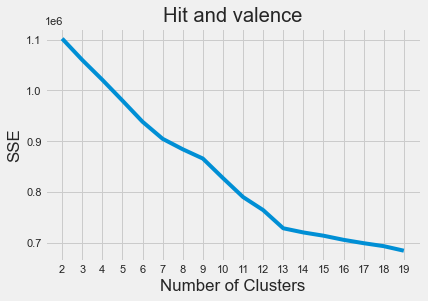

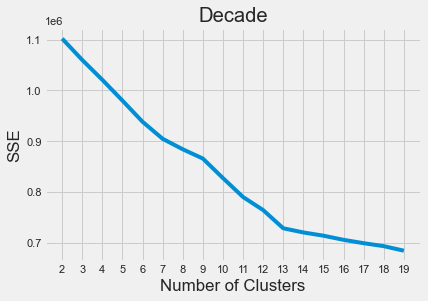

In [ ]:
plot_sse(sse_hv, [2, 20], "Hit and valence")
plot_sse(sse_d, [2, 20], "Decade")

Sometimes it is possible to see clearly where the elbow is which is a point where the SSE drops more than the usuall. On this case it not clear by eye. In order to find the optimal k we will use a python package called kneed.

In [ ]:
def find_opt_sse(sse, search_range):
    kl = KneeLocator(
        range(*search_range), sse, curve="convex", direction="decreasing"
    )
    kl.elbow
    kl.plot_knee()

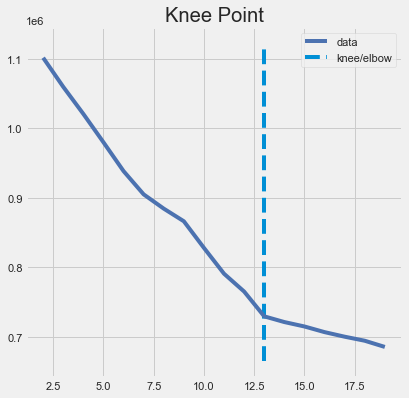

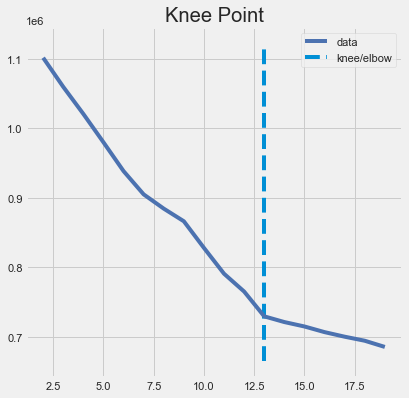

In [ ]:
find_opt_sse(sse_hv, [2,20])
find_opt_sse(sse_d, [2,20])

We now know that the optimal k according to SSE is 13.

### 2.6.2. Silhouette coefficient

Its not by chance that we used the elbow method first. The calculation of the silhouette coefficient is much more costly in term of computation. For that reason we will use the result from the elbow method to restrict our search for the optimal silhouette coefficient.

The silhouette coefficient measures cohesion and separation of the cluster by using the distance that each data point is to other points in the cluster and the distance that each point is to other points in other clusters. We of curse want to maximize the first and minimize the second.

In [ ]:
def calculate_silhouette_coefficients(data, search_range, kmeans_kwargs):
    silhouette_coefficients = []
    for k in range(*search_range):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(clust_hv_x)
        score = silhouette_score(clust_hv_x, kmeans.labels_)
        silhouette_coefficients.append(score)
    return silhouette_coefficients

In [ ]:
coefficientes_hv = calculate_silhouette_coefficients(clust_hv_x, [11, 15], kmeans_kwargs)
coefficientes_d = calculate_silhouette_coefficients(clust_d_x, [11, 15], kmeans_kwargs)

In [ ]:
def plot_silhouette_coefficients(coefficientes, search_range, title):
    plt.style.use("fivethirtyeight")
    plt.plot(range(*search_range), coefficientes)
    plt.xticks(range(*search_range))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.title(title)
    plt.show()

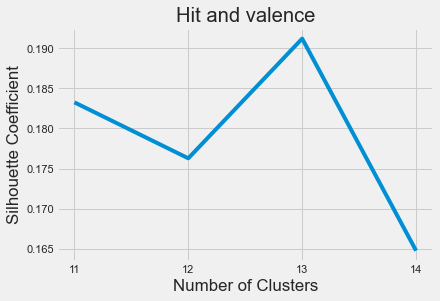

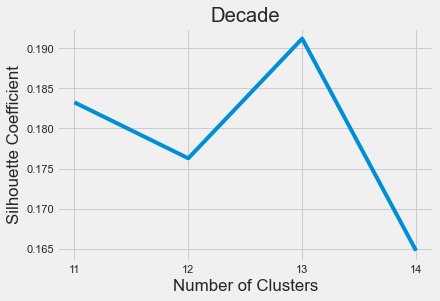

In [ ]:
plot_silhouette_coefficients(coefficientes_hv, [11, 15], "Hit and valence")
plot_silhouette_coefficients(coefficientes_d, [11, 15], "Decade")

We can see that the silhouette coefficients shows us that k = 13 is the optimal number of clusters.\
Lets train the models.

In [ ]:
kmeans_hv = KMeans(n_clusters=13, **kmeans_kwargs)
kmeans_hv.fit(clust_hv_x)

KMeans(n_clusters=13, random_state=42)

In [ ]:
kmeans_d = KMeans(n_clusters=13, **kmeans_kwargs)
kmeans_d.fit(clust_d_x)

KMeans(n_clusters=13, random_state=42)

## 2.7. Clustering - Results and Discussion 

The best way to see the results is to understand which classes are in each clster. For that we created a function that counts the number of tagets in all clusters

In [ ]:
import collections
def get_cluster_dist(labels, target1, n, target2=None):
    # Create n lists, each containing the index of the members of cluster i
    results = [ [] for _ in range(n) ]
    for i in range(len(labels)):
        results[labels[i]].append(i)
    
    # For each member replace index for their correspondent target value
    if(target2 is not None):
        for i in range(len(results)):
            results[i] = list(map(lambda x: (target1[x],target2[x]), results[i]))
    else:
        for i in range(len(results)):
            results[i] = list(map(lambda x: target1[x], results[i]))
        
    # Count how many target values are in each cluster
    counters = {}
    for i in range(len(results)):
        counters['Cluster ' + str(i + 1)] = collections.Counter(results[i])
    
    # Transform the dictionary of counters into a dataframe
    columns, data = zip(*[(key, value) for key, value in counters.items()])
    df = pd.DataFrame(data=list(data)).T.set_axis(columns, axis=1, inplace=False).T
    
    return df

Lets plot the results...

<AxesSubplot:>

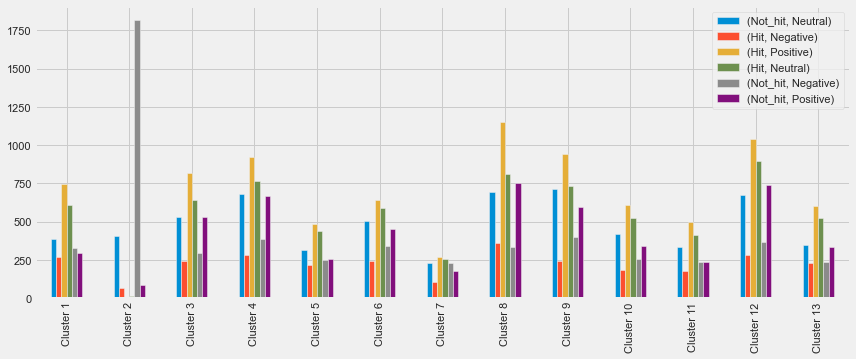

In [ ]:
clust_count = get_cluster_dist(kmeans_hv.labels_, clust_h_y, 13, clust_v_y)
clust_count.plot(kind='bar', figsize=(13,5))

Cluster 2 has a very intering result because almost of its songs are not a hit and have negative valence.\
For the other clusters you can see that the model was unable to separate songs in clusters of hit songs with similar valences. All the other clusters seem to have a mix of all the combinations.

Lets see if we the model did better in separating songs by decade.

<AxesSubplot:>

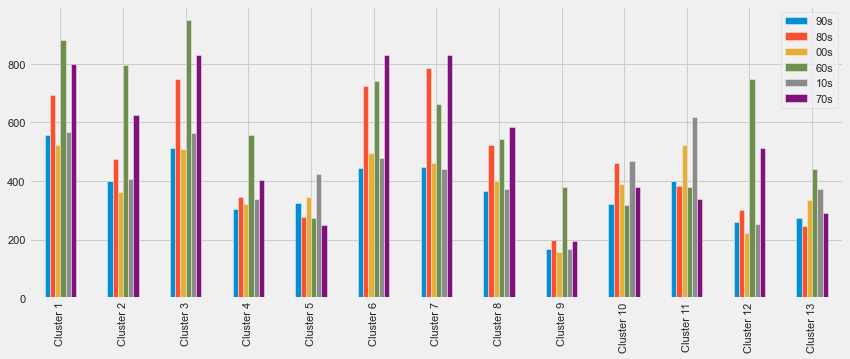

In [ ]:
clust_count = get_cluster_dist(kmeans_d.labels_, clust_d_y, 13)
clust_count.plot(kind='bar', figsize=(13,5))

The result is the same. All the clusters have a mix of all decades. This means the model was not able to separate the songs by decade.

## 3. Final Comments and Conclusions

- Dataset had a lot of data that did not make sense and for that reason was removed
- Support Vector Machine had great performance however it takes a lot of time to fit and find the best hyperparameters
- K-Nearest Neighbors performance is not bad and as a plus is fast to compute
- Association rule mining allowed us to get some very instering conclusions however it was influenced a lot by the inbaleced dataset 
- KMeans had awful results. The model was not capable of separating the features we were looking for